Cost Function
-------------

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
X = [1, 2, 3]
Y = [1, 2, 3]

# Set W as placeholder for plotting
W = tf.placeholder(tf.float32)
# Our hypothesis for linear model X * W
hypothesis = X * W # simplified hypothesis
# cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Launch the graph in a session.
sess = tf.Session()
# Initialize global variables in the graph.
sess.run(tf.global_variables_initializer())

# Variables for plotting cost function
W_val = []
cost_val = []
for i in range(-30, 50):
    feed_W = i * 0.1
    curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
    W_val.append(curr_W)
    cost_val.append(curr_cost)

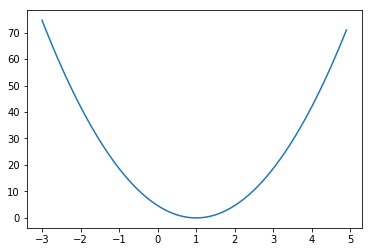

In [2]:
# Show the cost function
plt.plot(W_val, cost_val)
plt.show()

*Lec3: Gradient descent 수식
-------------
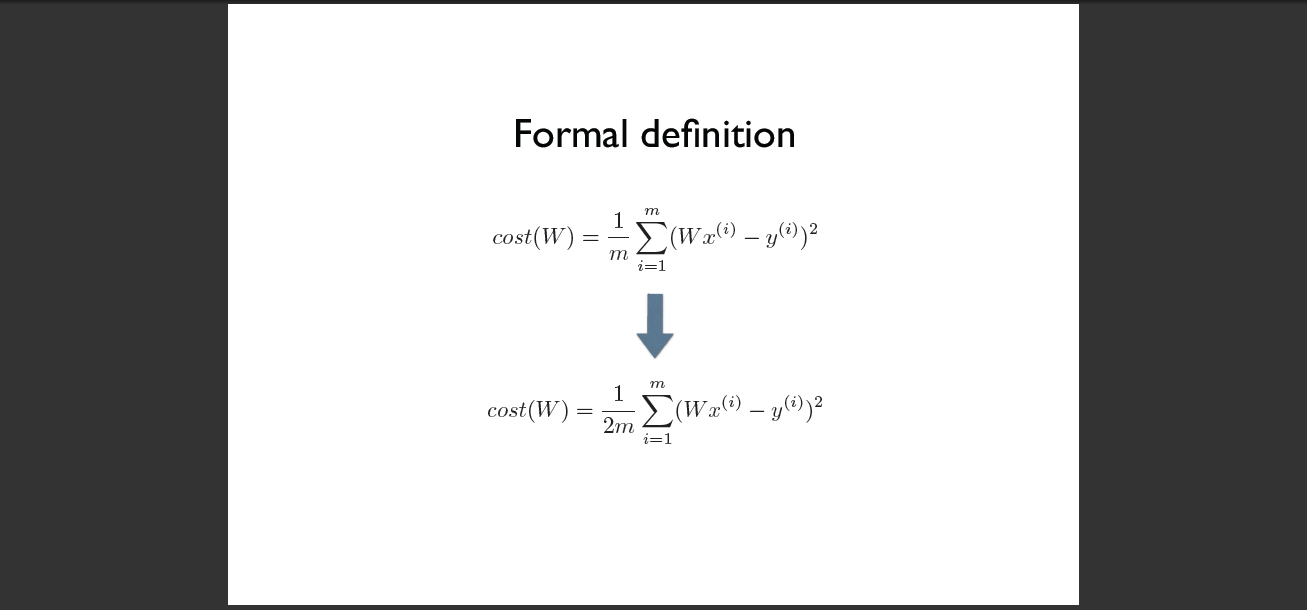
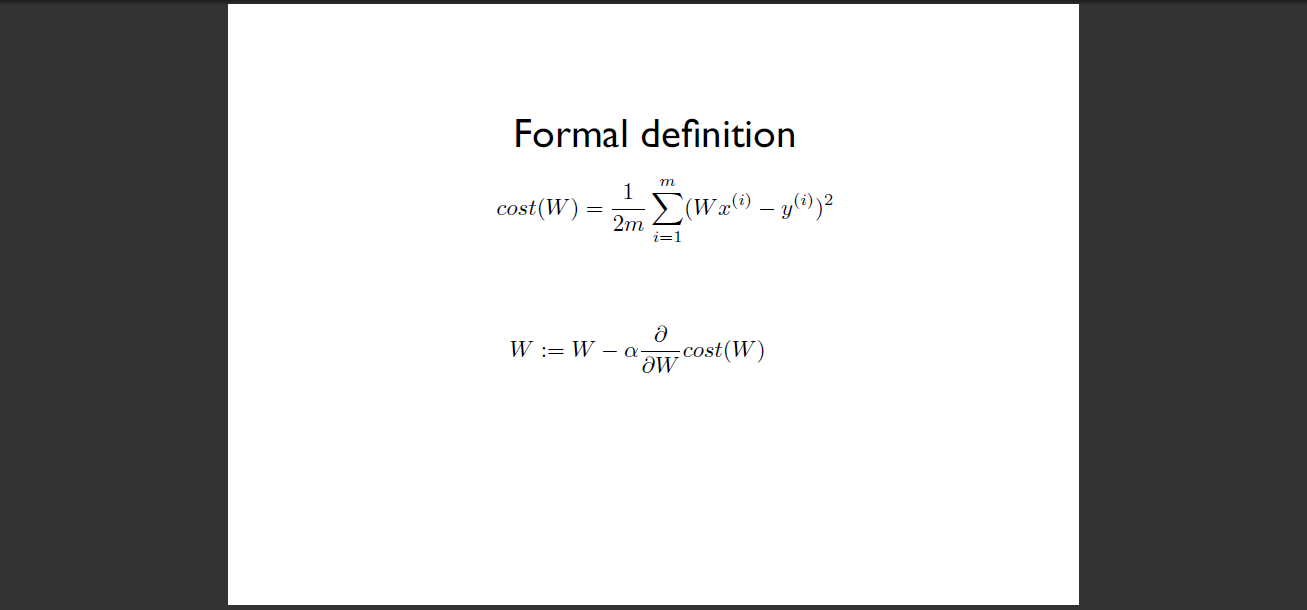

Gradient descent
-------------
- step을 진행할수록 cost는 감소, W는 1에 가까워진다

In [3]:
import tensorflow as tf
x_data = [1, 2, 3]
y_data = [1, 2, 3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize: Gradient Descent using derivative: W -= learning_rate * derivative
learning_rate = 0.1
gradient = tf.reduce_mean((W * X - Y) * X)
descent = W - learning_rate * gradient # W -= Learning_rate * derivative
update = W.assign(descent) # W에 새로운 값을 assign

sess = tf.Session()
sess.run(tf.global_variables_initializer())
for step in range(21):
    sess.run(update, feed_dict={X: x_data, Y: y_data})
    print(step, sess.run(cost, feed_dict={X: x_data, Y:y_data}), sess.run(W))

0 0.69210935 [0.61489075]
1 0.19686659 [0.7946084]
2 0.05599764 [0.8904578]
3 0.015928209 [0.9415775]
4 0.0045306976 [0.9688413]
5 0.0012887277 [0.98338205]
6 0.00036657133 [0.9911371]
7 0.00010426948 [0.9952731]
8 2.9657916e-05 [0.997479]
9 8.436026e-06 [0.9986555]
10 2.3992045e-06 [0.99928296]
11 6.824891e-07 [0.9996176]
12 1.9409673e-07 [0.99979603]
13 5.52325e-08 [0.9998912]
14 1.5703048e-08 [0.999942]
15 4.4621387e-09 [0.99996907]
16 1.2740848e-09 [0.9999835]
17 3.6315365e-10 [0.9999912]
18 1.0291146e-10 [0.9999953]
19 2.984753e-11 [0.9999975]
20 7.716494e-12 [0.9999987]


GradientDescentOptimizer
-------------
- cost function을 미분하기 어려운 경우 다음의 magic을 이용한다

In [4]:
# Minimize: Gradient Descent Magic
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)
train = optimizer.minimize(cost)

Full Code
-------------
- W = 5, W = -3일 경우 모두 1에 가까운 값으로 학습된다

In [5]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]
W = tf.Variable(-5.0)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    print(step, sess.run(W))
    sess.run(train)

0 -5.0
1 0.5999999
2 0.97333336
3 0.99822223
4 0.9998815
5 0.9999921
6 0.99999946
7 1.0
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0


In [6]:
import tensorflow as tf

X = [1, 2, 3]
Y = [1, 2, 3]
W = tf.Variable(-3.0)

hypothesis = X * W
cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.1)
train = optimizer.minimize(cost)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(21):
    print(step, sess.run(W))
    sess.run(train)

0 -3.0
1 0.7333336
2 0.98222226
3 0.9988148
4 0.99992096
5 0.9999947
6 0.99999964
7 0.99999994
8 1.0
9 1.0
10 1.0
11 1.0
12 1.0
13 1.0
14 1.0
15 1.0
16 1.0
17 1.0
18 1.0
19 1.0
20 1.0


Optional: compute_gradient, apply_gradient
-------------
- compute_gradient: cost에 맞는 gradient를 return 받는다
- apply_gradient: gradient를 수정하여 모델에 적용할 수 있다

In [7]:
import tensorflow as tf
X = [1, 2, 3]
Y = [1, 2, 3]

# Set wrong model weights
W = tf.Variable(5.)

hypothesis = X * W

# 1. Manual gradient
gradient = tf.reduce_mean((W * X - Y) * X) * 2

cost = tf.reduce_mean(tf.square(hypothesis - Y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

# 2. Get gradients (3. with according W)
gvs = optimizer.compute_gradients(cost, [W])
# Apply gradients
apply_gradients = optimizer.apply_gradients(gvs)

sess = tf.Session()
sess.run(tf.global_variables_initializer())

for step in range(20):
    print(step, sess.run([gradient, gvs]))
    sess.run(apply_gradients)

0 [37.333332, [(37.333336, 5.0)]]
1 [33.84889, [(33.84889, 4.6266665)]]
2 [30.689657, [(30.689657, 4.2881775)]]
3 [27.825287, [(27.825287, 3.9812808)]]
4 [25.228262, [(25.228262, 3.703028)]]
5 [22.873621, [(22.873623, 3.4507453)]]
6 [20.738752, [(20.73875, 3.2220092)]]
7 [18.803137, [(18.803137, 3.0146217)]]
8 [17.048176, [(17.048176, 2.8265903)]]
9 [15.457013, [(15.457014, 2.6561086)]]
10 [14.014359, [(14.01436, 2.5015385)]]
11 [12.706352, [(12.706352, 2.361395)]]
12 [11.520427, [(11.520427, 2.2343314)]]
13 [10.445186, [(10.445185, 2.119127)]]
14 [9.470302, [(9.470302, 2.0146751)]]
15 [8.586407, [(8.586407, 1.9199722)]]
16 [7.785009, [(7.785009, 1.8341081)]]
17 [7.0584083, [(7.0584083, 1.756258)]]
18 [6.399624, [(6.399624, 1.685674)]]
19 [5.8023257, [(5.8023252, 1.6216778)]]
